# Introduction
This colab worksheet provides a starting point for the computer vision assignment. 

# Data Loading

In [1]:
# Download the data stored in a zipped numpy array from one of these two locations
# The uncommented one is likely to be faster. If you're running all your experiments
# on a machine at home rather than using colab, then make sure you save it 
# rather than repeatedly downloading it.

#!wget "http://users.sussex.ac.uk/~is321/training_images.npz" -O training_images.npz
!wget "https://sussex.box.com/shared/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz" -O training_images.npz

# The test images (without points)
#!wget "http://users.sussex.ac.uk/~is321/test_images.npz" -O test_images.npz
!wget "https://sussex.box.com/shared/static/xxlgvjpa86s6xgjzy5im06saoj57s7gt.npz" -O test_images.npz

# The example images are here
#!wget "http://users.sussex.ac.uk/~is321/examples.npz" -O examples.npz
!wget "https://sussex.box.com/shared/static/kbodelmaqw5dd59i5x2kis55lor7ydhf.npz" -O examples.npz



--2022-05-12 11:47:58--  https://sussex.box.com/shared/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Resolving sussex.box.com (sussex.box.com)... 107.152.26.197
Connecting to sussex.box.com (sussex.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz [following]
--2022-05-12 11:47:58--  https://sussex.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Reusing existing connection to sussex.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sussex.app.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz [following]
--2022-05-12 11:47:59--  https://sussex.app.box.com/public/static/jqrklxpl2c5hnrkpa2m7f9da2o3np8g9.npz
Resolving sussex.app.box.com (sussex.app.box.com)... 185.235.236.201
Connecting to sussex.app.box.com (sussex.app.box.com)|185.235.236.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Lo

# Check the data downloaded correctly
If any of these assertions fail, redownload the data

In [2]:
def confirm_checksum(filename, true_checksum):
  import subprocess
  checksum = subprocess.check_output(['shasum',filename]).decode('utf-8')
  assert checksum.split(' ')[0] == true_checksum, 'Checksum does not match for ' + filename + ' redownload the data.'

confirm_checksum('training_images.npz', 'f313a54fc57a1235e6307d176fc5fc83fd7ec530')
confirm_checksum('test_images.npz', '4b9efd8eb3b87c07d9c5400ef2494d476bc318a3')
confirm_checksum('examples.npz', 'bf51ebbf42f17e3cbe06bb299746565c53d16c40')

# Load the data

In [3]:
import numpy as np


# Load the data using np.load
data = np.load('training_images.npz', allow_pickle=True)

# Extract the images
images = data['images']
# and the data points
pts = data['points']

print(images.shape, pts.shape)

test_data = np.load('test_images.npz', allow_pickle=True)
test_images = test_data['images']
print(test_images.shape)

#Adding example images for the quantitative data
example_data = np.load('examples.npz', allow_pickle = True)
example_pics = example_data['images']
print (example_pics.shape)

(2811, 244, 244, 3) (2811, 42, 2)
(554, 244, 244, 3)
(6, 244, 244, 3)


# Data Visualisation
Here's an example of how to display the images and their points

In [4]:
pts = np.clip(pts,0,244) #preprocessing - making sure all training points are points within the range of 0 - 244

In [5]:
def preprocessing (img, pts):
  """
  Augment pixel intensity.
  :param image: Image to be 'brightened'.
  :param points: Points of corresponding image.
  :return: Augmented pair of image and point.
  """
  # Creating another copy of the initial picture.
  new_copy = img.copy()
  copy_points = pts.copy()

  # Expand dimensions of image.
  examples = increase_proportion (data, 0)

  # Probability to decide if darker or brighter.
  brightness_probability = random.uniform(0,1)
  if brightness_probability < 0.5:
    generate_image = ImageDataGenerator(brightness_range=[0.5,0.5])
  else:
    generate_image = ImageDataGenerator(brightness_range=[1.1,1.2])
  it = generate_image.flow(examples, batch_size = 1)
  batch = it.next()
  processed_image = batch[0].astype("uint8")
 
  return processed_image, pts

Epoch 1/50
66/66 [==============================] - 14s 36ms/step - loss: 3834.7532 - accuracy: 0.7880 - val_loss: 2592.2615 - val_accuracy: 0.8168
Epoch 2/50
66/66 [==============================] - 2s 26ms/step - loss: 2523.9734 - accuracy: 0.8435 - val_loss: 2426.8469 - val_accuracy: 0.8440
Epoch 3/50
66/66 [==============================] - 2s 25ms/step - loss: 2466.0762 - accuracy: 0.8453 - val_loss: 2425.6777 - val_accuracy: 0.8464
Epoch 4/50
66/66 [==============================] - 2s 25ms/step - loss: 2429.5671 - accuracy: 0.8470 - val_loss: 2352.9209 - val_accuracy: 0.8478
Epoch 5/50
66/66 [==============================] - 2s 26ms/step - loss: 2347.0151 - accuracy: 0.8486 - val_loss: 2515.5842 - val_accuracy: 0.8490
Epoch 6/50
66/66 [==============================] - 2s 26ms/step - loss: 1791.3459 - accuracy: 0.8771 - val_loss: 1418.9995 - val_accuracy: 0.8981
Epoch 7/50
66/66 [==============================] - 2s 26ms/step - loss: 1412.6287 - accuracy: 0.8988 - val_loss: 147

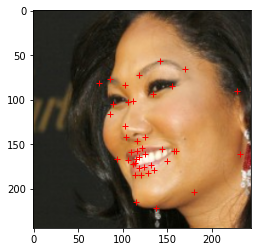

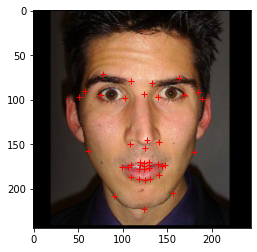

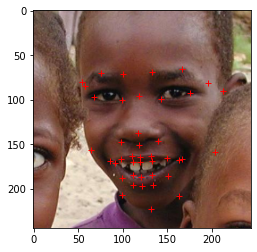

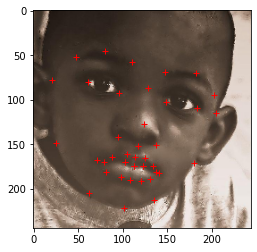

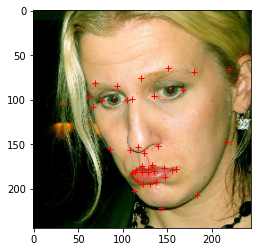

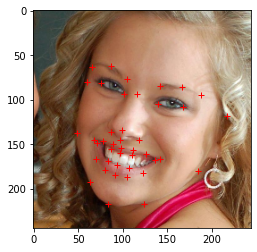

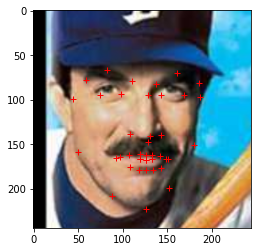

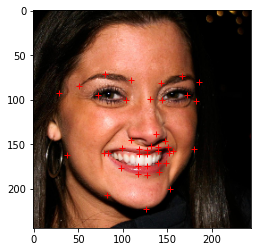

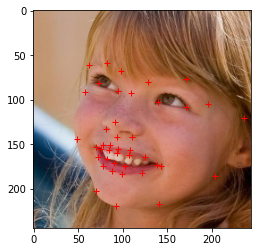

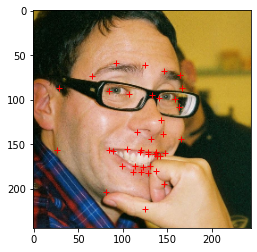

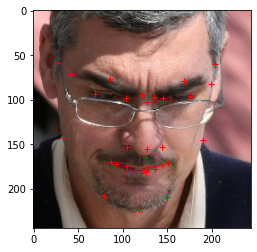

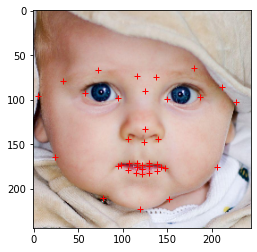

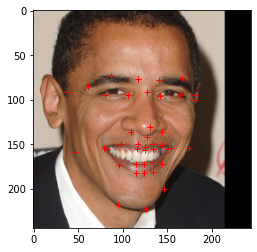

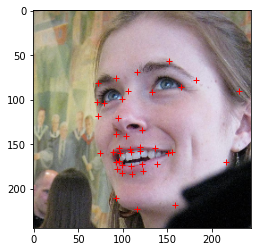

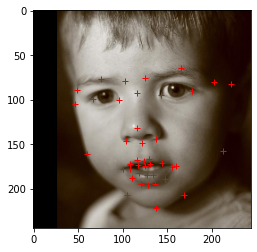

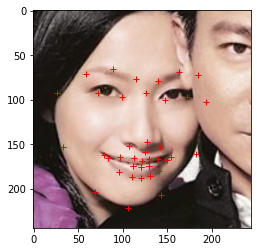

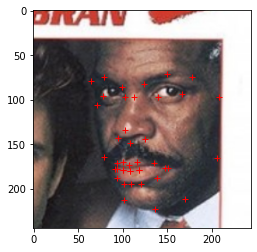

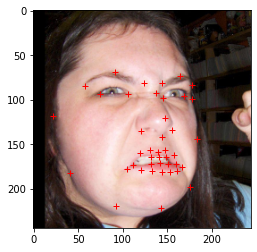

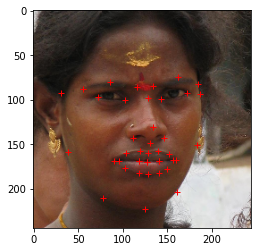

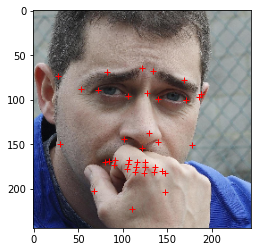

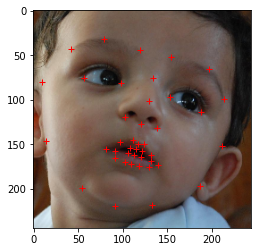

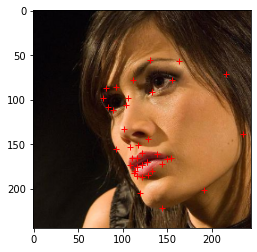

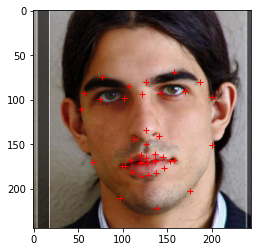

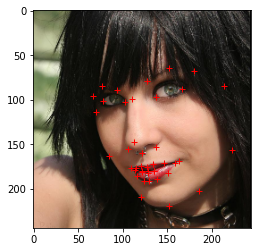

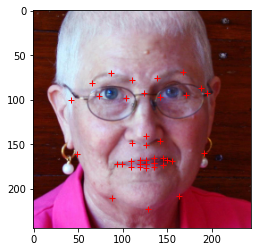

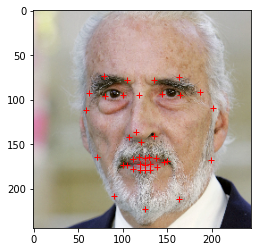

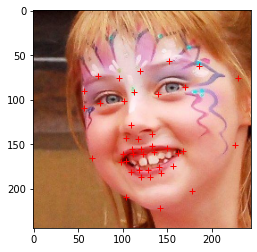

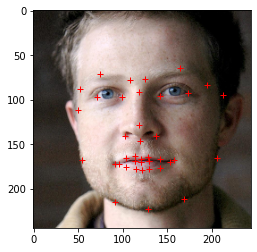

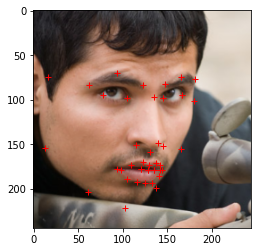

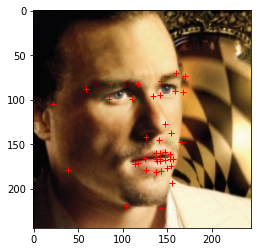

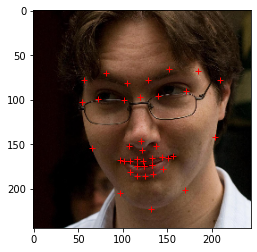

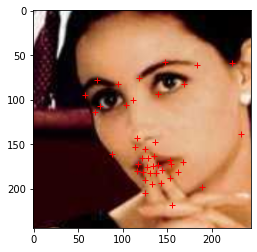

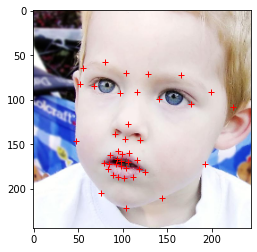

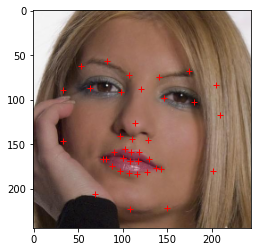

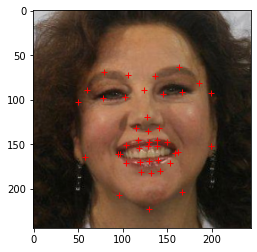

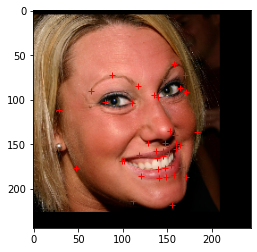

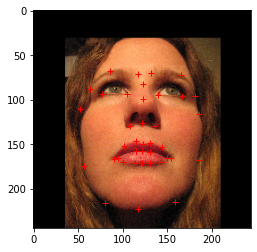

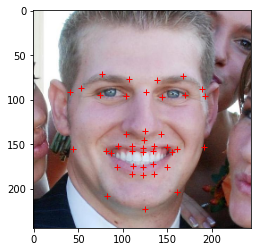

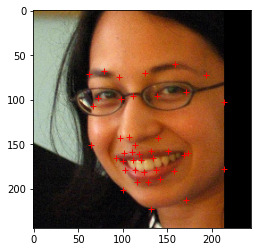

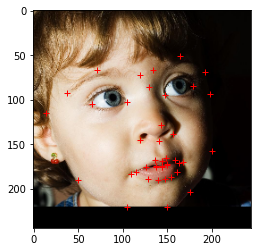

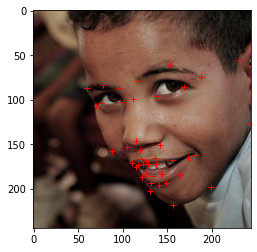

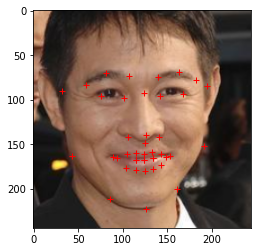

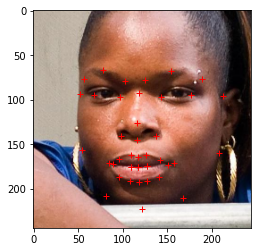

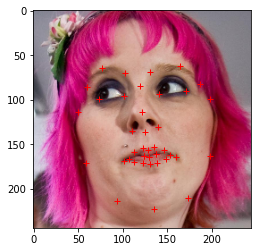

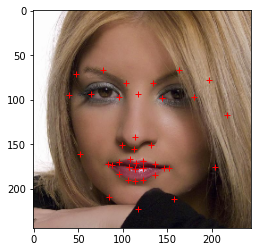

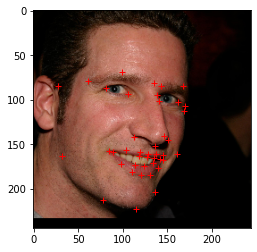

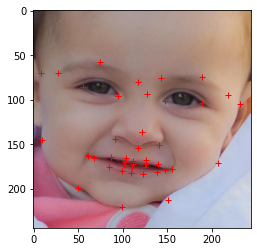

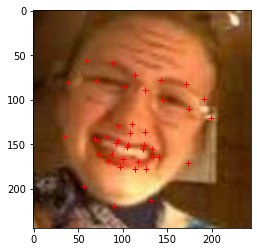

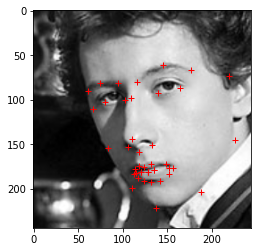

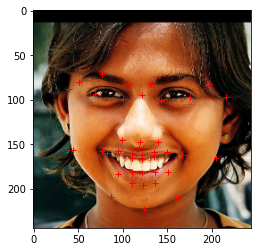

In [6]:

def visualise_pts(img, pts):
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.plot(pts[:, 0], pts[:, 1], '+r')
  plt.show()

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
model = models.Sequential()

model.add(layers.Conv2D(8, (5, 5), activation='relu', input_shape=(244, 244, 3))) #CONVOLUTIONAL LAYER 1
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3,3), activation='relu'))  #CONVOLUTIONAL LAYER 2
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3,3), activation='relu'))  #CONVOLUTIONAL LAYER 3
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1,1), activation='relu'))  #CONVOLUTIONAL LAYER 4
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (1,1), activation='relu'))  #CONVOLUTIONAL LAYER 5
model.add(layers.MaxPooling2D((2, 2)))

#flattening 
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Reshape((42,2)))
train_1 ,test_2 ,train_3,test_4 = train_test_split(images,pts, test_size=0.25, random_state=100)
model.compile(optimizer = 'adam', loss= 'mse', metrics=['accuracy'])

history = model.fit(train_1, train_3, epochs= 50, validation_data=(test_2, test_4))


for i in range(50):
  idx = np.random.randint(0, images.shape[0])
  visualise_pts(images[idx, ...], pts[idx, ...])



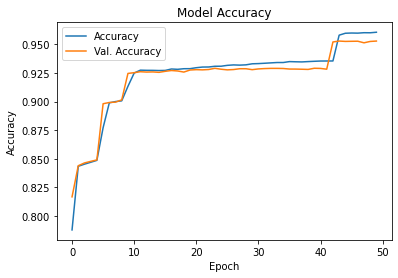

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val. Accuracy'])
plt.show()

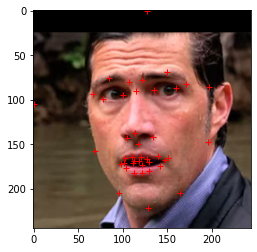

In [8]:
test_pts = model.predict(test_images)
for i in range(1):
  idx = np.random.randint(0, test_images.shape[0])
  visualise_pts(test_images[idx, ...], test_pts[idx, ...])

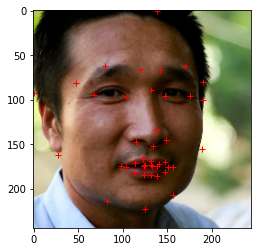

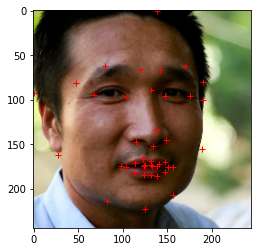

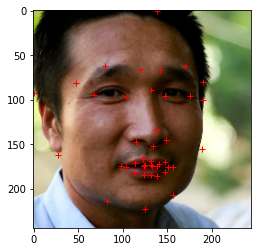

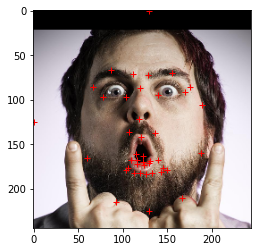

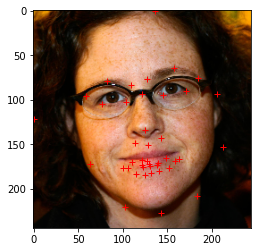

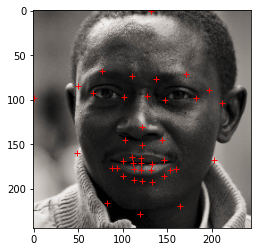

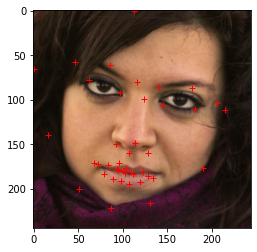

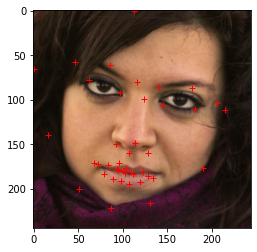

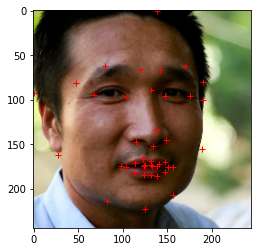

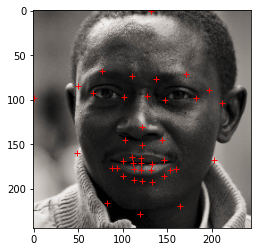

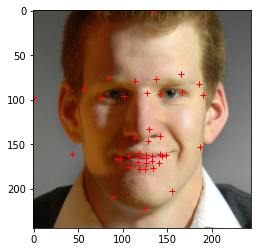

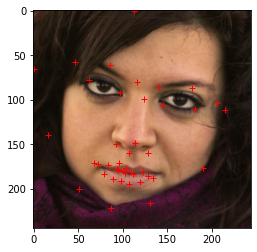

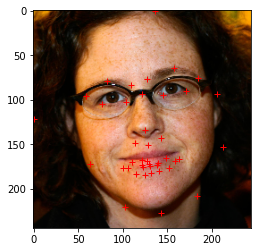

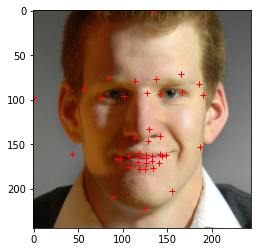

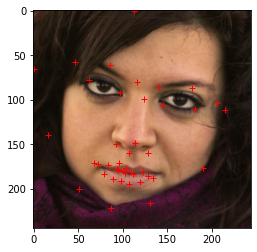

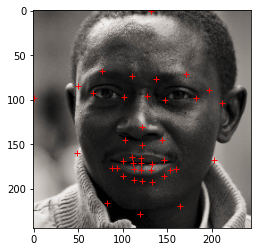

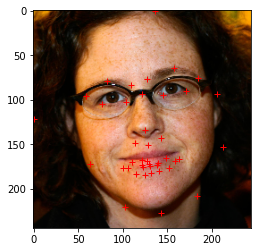

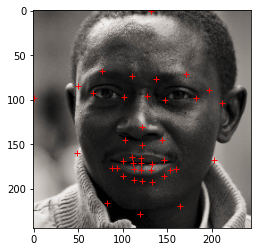

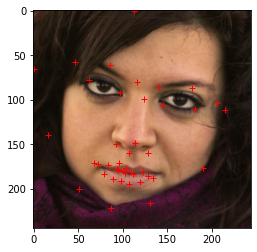

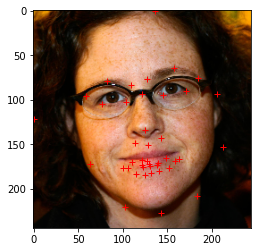

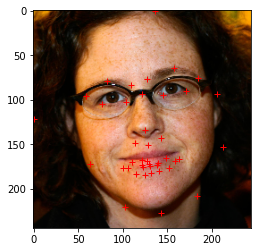

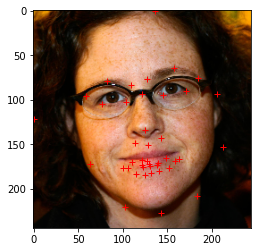

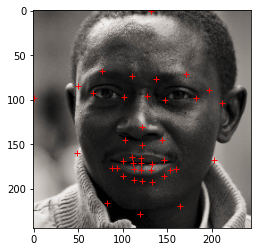

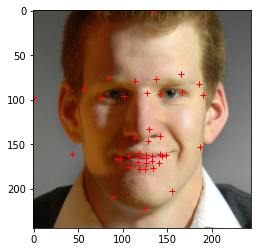

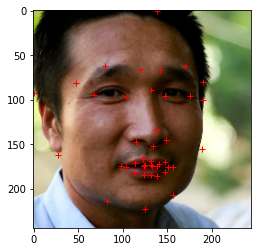

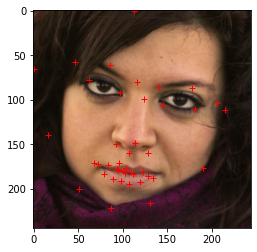

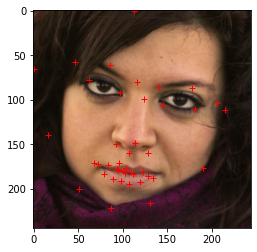

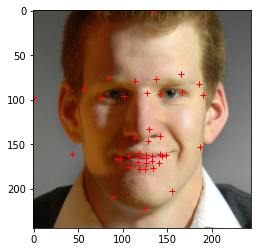

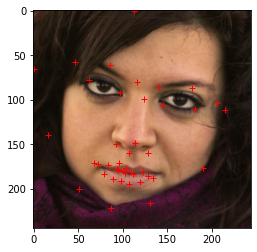

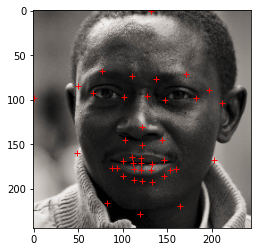

In [9]:
example_pts = model.predict(example_pics)
for i in range(30):
  idx = np.random.randint(0, example_pics.shape[0])
  visualise_pts(example_pics[idx, ...], example_pts[idx, ...])

In [13]:
def euclid_dist(pred_pts, gt_pts):
  """
  Calculate the euclidean distance between pairs of points
  :param pred_pts: The predicted points
  :param gt_pts: The ground truth points
  :return: An array of shape (no_points,) containing the distance of each predicted point from the ground truth
  """
  
 # import numpy as np
  #pred_pts = np.reshape(pred_pts, (-1, 2))
#gt_pts = np.reshape(gt_pts, (-1, 2))
 # return np.sqrt(np.sum(np.square(pred_pts - gt_pts), axis=-1))

  
#distance = euclid_dist(test_pts, pts)

#x = np.arange(0, len(distance))/42
#y = distance
  
#import matplotlib.pyplot as plt
#plt.plot(x,y)
#plt.title("Euclidean Distances between Points")
#plt.xlabel("points")
#plt.ylabel("ed")
#plt.show()

#plt.hist([test_pts.flatten(), pts.flatten()])
#plt.title("Predicted Points vs Definite Points")
#plt.xlabel("Flattened Location")
#plt.ylabel("Number of points")
#plt.legend("Predicted", "Definite")
#plt.show

  




In [11]:
def save_as_csv(points, location = '.'):
    """
    Save the points out as a .csv file
    :param points: numpy array of shape (no_test_images, no_points, 2) to be saved
    :param location: Directory to save results.csv in. Default to current working directory
    """
    assert points.shape[0]==554, 'wrong number of image points, should be 554 test images'
    assert np.prod(points.shape[1:])==2*42, 'wrong number of points provided. There should be 42 points with 2 values (x,y) per point'
    np.savetxt(location + '/results.csv', np.reshape(points, (points.shape[0], -1)), delimiter=',')
    
save_as_csv(test_pts)

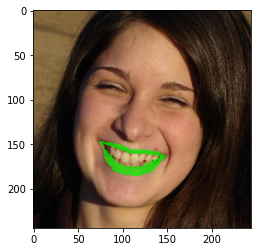

In [12]:
import cv2

def lips_modification_system (img,pts,color):

  chosen_image = np.copy(img)
  modify_image = np.copy(img)
  modify_image = cv2.fillPoly(modify_image, pts=np.int32([pts[22:]]), color=color)
  transparency = 0.7
  cv2.addWeighted(modify_image, transparency, chosen_image, 0.3, 0, chosen_image)
  return (chosen_image)

lips_modification_color = lips_modification_system (images[234],pts[234],(0,255,0))
plt.imshow(lips_modification_color)
plt.show()